In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [2]:
df = pd.read_csv("owid-covid-data.csv", parse_dates=['date'])

In [3]:
df_usa =  df[df.iso_code == 'USA']

In [4]:
df_week = df_usa.copy()

In [5]:
df_week_new_cases = df_week[['date', 'new_cases']].resample('W', on = 'date').agg({'new_cases': ['min', 'mean', 'max']})
df_week_new_cases.columns = ['min', 'mean', 'max']

C:\Users\JShah\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



[Text(0, 0.5, 'New Cases Count'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'New Cases of Covid19 in USA on weekly basis')]

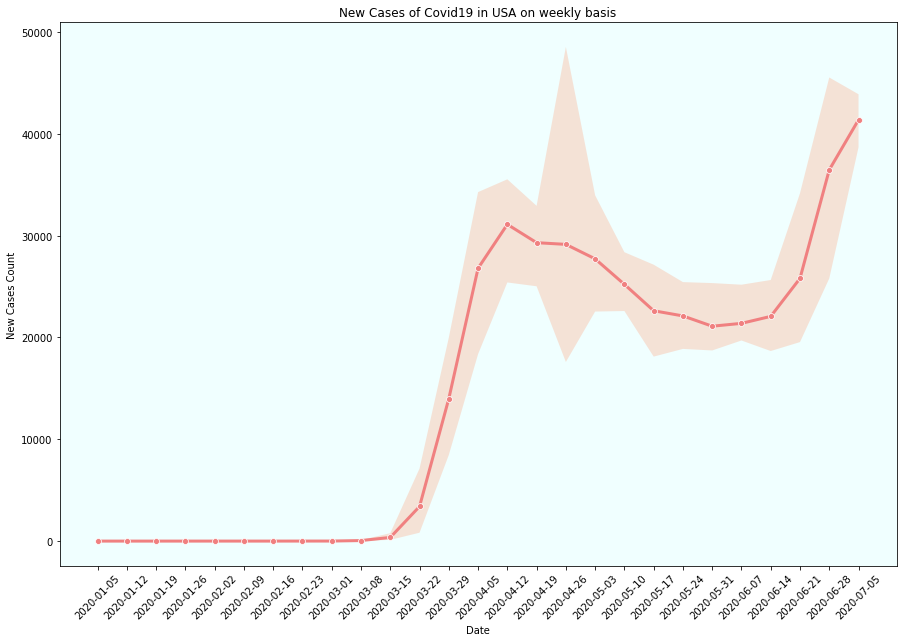

In [6]:
fig, ax = plt.subplots(figsize = (15,10)) 

ax = sns.lineplot(df_week_new_cases.index, df_week_new_cases['mean'], color = 'lightcoral', marker = 'o', linewidth = 3.0) 

ax.fill_between(df_week_new_cases.index, df_week_new_cases['min'], df_week_new_cases['max'],\
                facecolor ='lightsalmon', alpha = 0.3) 

ax.set_facecolor('azure')
ax.xaxis.set(ticks = df_week_new_cases.index, )
ax.tick_params(axis='x', rotation=45)
ax.set(title = "New Cases of Covid19 in USA on weekly basis", ylabel = 'New Cases Count', xlabel = 'Date')

In [7]:
df_age = pd.read_csv('COVID-19_Cases_Summarized_by_Age_Group.csv', parse_dates=['Specimen Collection Date'])\
.drop('Last Updated at', axis =1)


In [8]:
grouped_age = df_age.groupby('Age Group')[['Specimen Collection Date', 'Age Group', 'New Confirmed Cases']]\
.resample('M', on = 'Specimen Collection Date').sum().reset_index()

[Text(0, 0.5, 'New Cases Count'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'New Cases of Covid19 in USA on Monthly basis')]

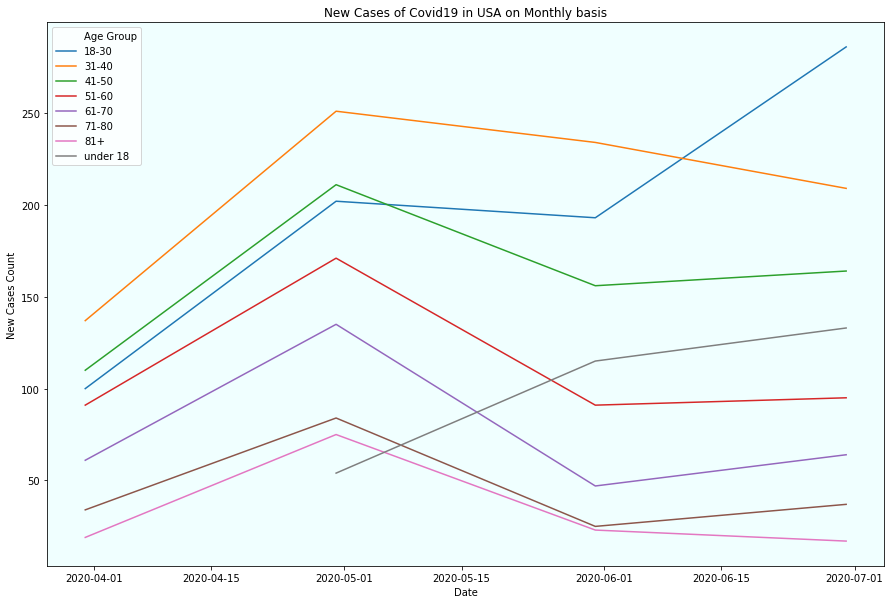

In [9]:
fig, ax = plt.subplots(figsize = (15,10)) 
ax = sns.lineplot(x = 'Specimen Collection Date', y = 'New Confirmed Cases', data = grouped_age, hue = 'Age Group')


ax.set_facecolor('azure')
ax.set(title = "New Cases of Covid19 in USA on Monthly basis", ylabel = 'New Cases Count', xlabel = 'Date')

In [10]:
df3 = pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_Week.csv', parse_dates=['Week ending Date'])
df3 = df3.drop(['Data as of', 'State'], axis=1).drop(df3[df3['Sex'] == 'All Sex'].index)
age_dict = { "Under 1 year" : "Under 15",
            "1-4 years" : "Under 15",
            "5-14 years" : "Under 15",
            "15-24 years" : "15-24",
            "25-34 years" : "25-34",
            "35-44 years" : "35-44",
            "45-54 years" : "45-54",
            "55-64 years" : "55-64",
            "65-74 years" : "65-74",
            "75-84 years" : "Over 75",
            "85 years and over" : "Over 75"
           }

In [11]:
df3['Age Group'] = df3['Age Group'].map(age_dict)

In [12]:
grouped_age2 = df3.groupby('Sex')[['Week ending Date', 'Age Group', 'Sex', 'COVID-19 Deaths']]\
.resample('M', on = 'Week ending Date').sum().reset_index().pivot_table(index = 'Week ending Date', columns = 'Sex',\
                                                                        values = 'COVID-19 Deaths', aggfunc=sum).apply(lambda x:100 * x / float(x.sum()),\
                                                                                                                       axis =1).round(2)

[Text(0, 0.5, 'New Cases Count'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'New Cases of Covid19 in USA on Monthly basis')]

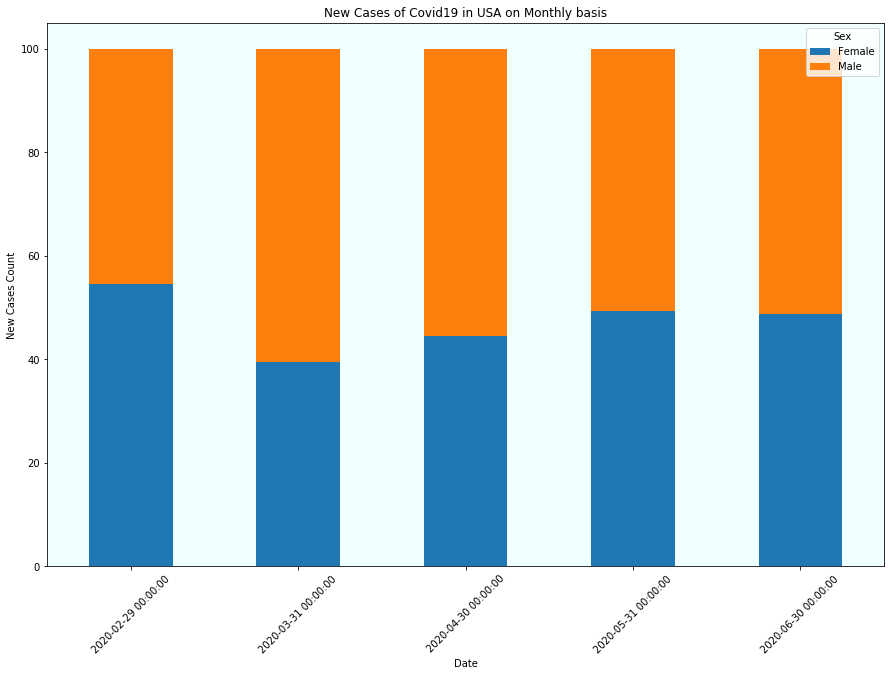

In [13]:
fig, ax = plt.subplots(figsize = (15,10)) 

grouped_age2.plot(kind = 'bar', stacked = 'true', ax = ax)

# plt.xaxis.set(ticks = grouped_age2.index, )
ax.tick_params(axis='x', rotation=45)
ax.set_facecolor('azure')
ax.set(title = "New Cases of Covid19 in USA on Monthly basis", ylabel = 'New Cases Count', xlabel = 'Date')

In [14]:
grouped_sex = df3.groupby('Sex')['COVID-19 Deaths'].sum()

[Text(0.5, 1.0, 'Male to Female Proportion')]

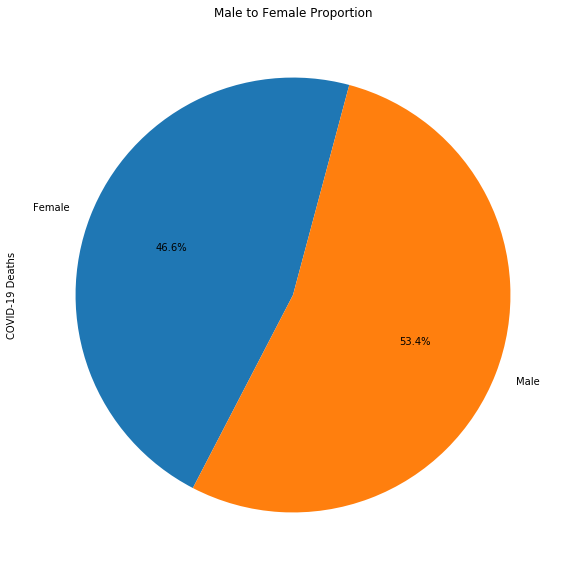

In [15]:
fig, ax = plt.subplots(figsize = (15,10)) 
grouped_sex.plot.pie(y = 'COVID-19 Deaths', x  = 'Sex', autopct='%1.1f%%', startangle=75)
ax.set_facecolor('azure')
ax.set(title = "Male to Female Proportion")

In [16]:
df_state = pd.read_csv('states.csv')

In [17]:
df_state_clean = df_state.drop(['Data as of', 'Footnote', 'Indicator'], axis = 1)\
.loc[df_state['Indicator'] == 'Count of COVID-19 deaths', :].reset_index(drop = True).fillna(0)

In [18]:
df_state_clean.columns = ['State', 'White', 'Black', 'Native American', 'Asian', 'Hispanic', 'Other']
df_state_clean = df_state_clean.set_index('State').apply(lambda x:100 * x / float(x.sum()), axis =1).round(2).reset_index()
df_state_clean.replace('[<].+','',regex=True, inplace = True)

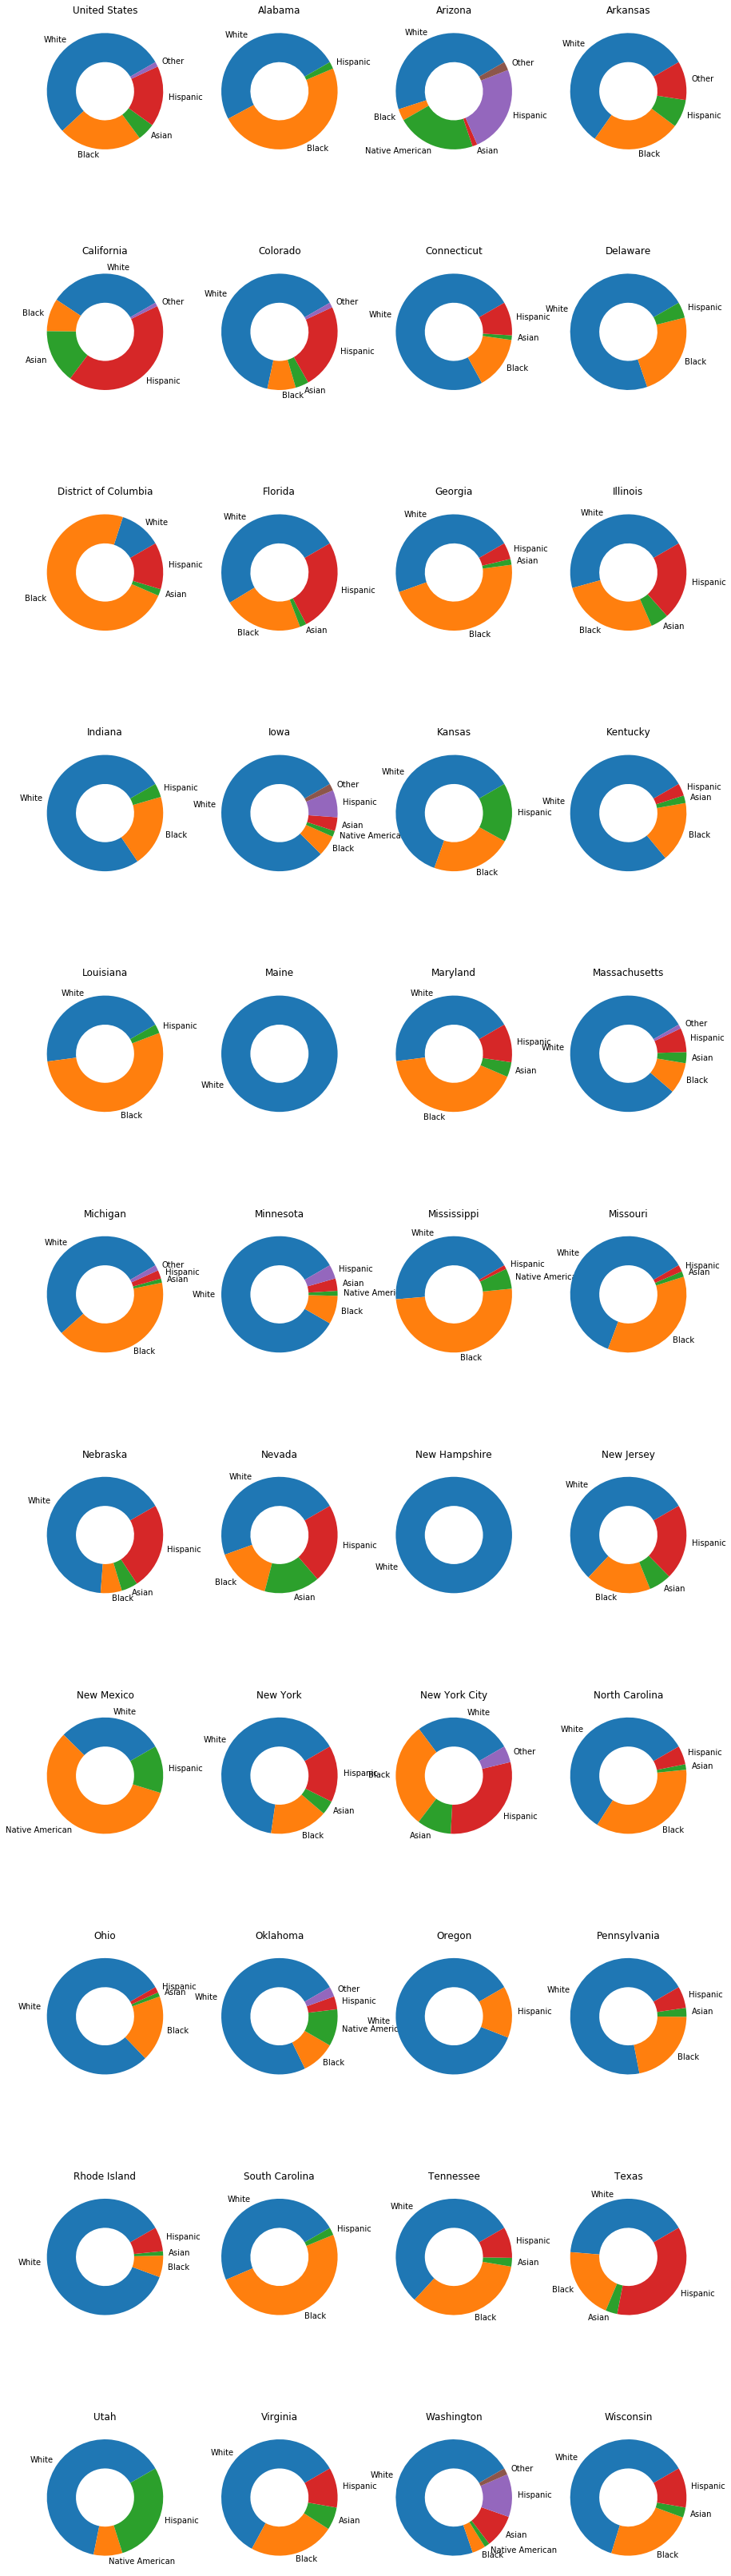

In [19]:
fig, axes = plt.subplots(int(len(df_state_clean)/4), 4, figsize=(15, 60))

for i, (idx, row) in enumerate(df_state_clean.set_index('State').iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, wedgeprops=dict(width=0.5))
    ax.set_title(idx)

fig.subplots_adjust(wspace=.2)

In [20]:
print(grouped_age2.index)

DatetimeIndex(['2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30'],
              dtype='datetime64[ns]', name='Week ending Date', freq=None)
